In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
base_data_folder = 'data_template_matching/'

In [3]:
def show_image(img, title=""):
    plt.figure(figsize=(10,10))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    if title:
        plt.title(title)
    
def read_img(filename):
    return cv2.imread(base_data_folder + filename)

In [4]:
def sad_match_template(img, template):
    height, width, _ = img.shape
    template_height, template_width, _ = template.shape
    result_height = height - template_height + 1
    result_width = width - template_width + 1
    result = np.zeros((result_height, result_width))
    
    for i in range(0, result_height):
        for j in range(0, result_width):
            search = img[i:i+template_height, j:j+template_width].copy()
            result[i,j] = np.sum(np.abs(search - template))
    return result

In [5]:
def run_cv_template_matching(search_image_name, template_image_name, template_rect, method):
    rect_x, rect_y, rect_w, rect_h = template_rect

    img = read_img(search_image_name)
    template_img = read_img(template_image_name)
    template = template_img[rect_y:rect_y+rect_h,rect_x:rect_x+rect_w]
    show_image(img, "Source Image:")
    show_image(template, "Template Image:") 
    
    if method == 'SAD':
        result = sad_match_template(img, template)
    else:
        result = cv2.matchTemplate(img, template, method)
        
    minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(result, None)
    if method == cv2.TM_CCORR_NORMED:
        matchLoc = maxLoc
        matchVal = maxVal
        
    else:
        matchLoc = minLoc
        matchVal = minVal
    
    display = img.copy()
    cv2.rectangle(display, matchLoc, (matchLoc[0] + template.shape[1], matchLoc[1] + template.shape[0]), (255,0,0), 2, 8, 0 )
    show_image(display, "Result:")
    print("Match val: {}".format(matchVal))

# SAD

Match val: 0.0


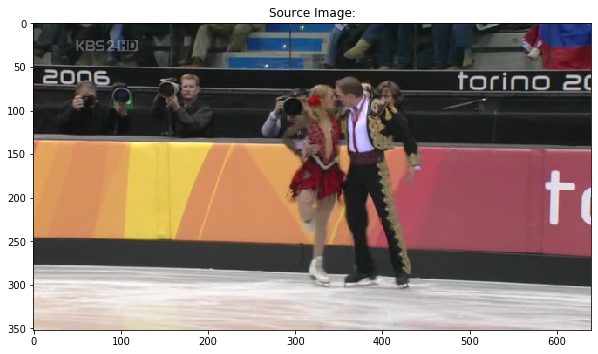

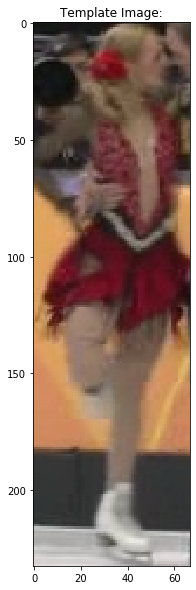

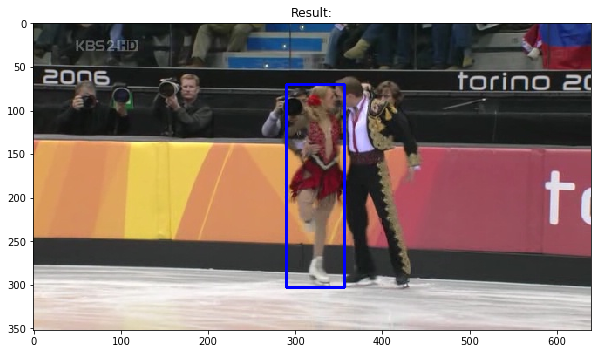

In [6]:
template_rect1 = (290,70,67,233)
template_img = "1.jpg"
search_img = template_img
method = "SAD"
run_cv_template_matching(search_img, template_img, template_rect1, method)

Template image is from search image. 100% match, min value is 0.0

Match val: 5092521.0


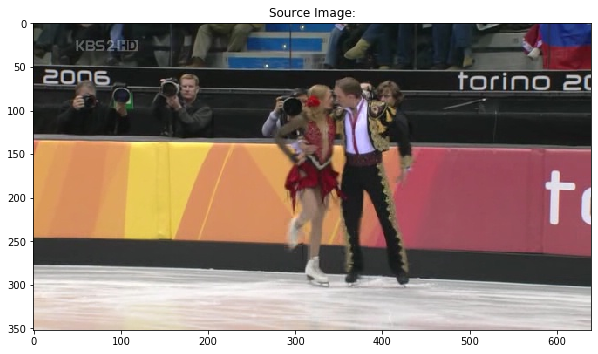

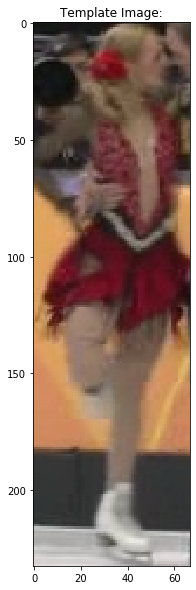

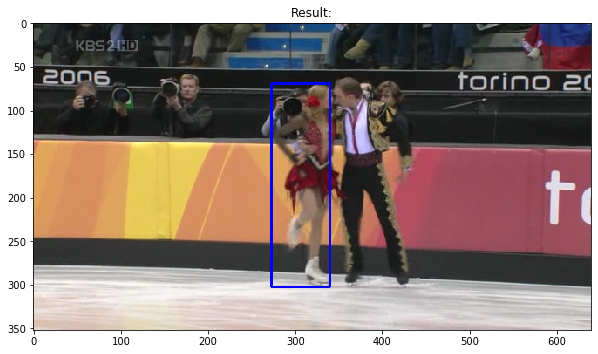

In [7]:
search_img = "2.jpg"
run_cv_template_matching(search_img, template_img, template_rect1, method)

Template image is from different but very similar image. Not 100% match, rectangle is shifted a little bit

Match val: 5160770.0


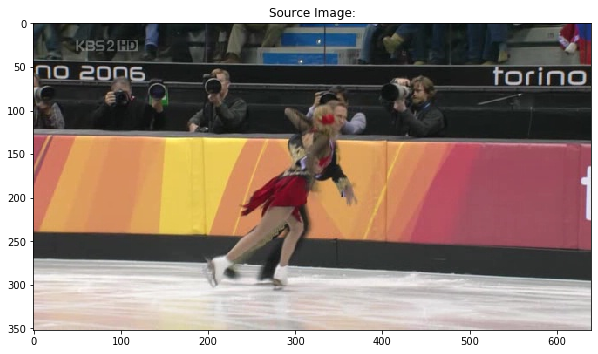

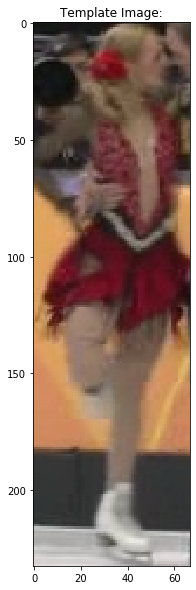

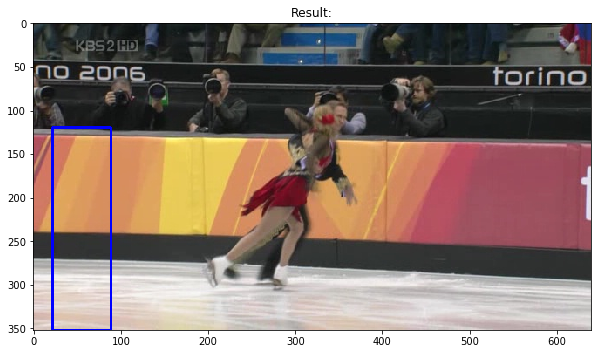

In [8]:
search_img = "3.jpg"
run_cv_template_matching(search_img, template_img, template_rect1, method)

Template image is from different image. No match, min value is very high.

# SSD

Match val: 0.0


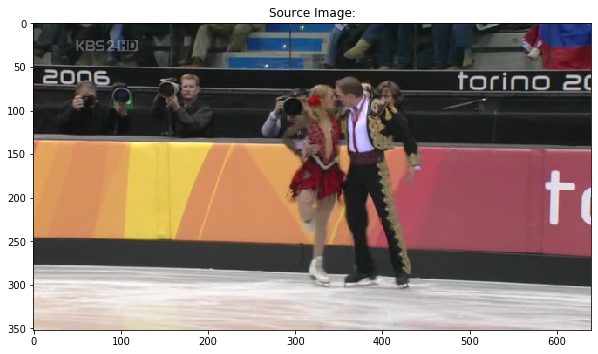

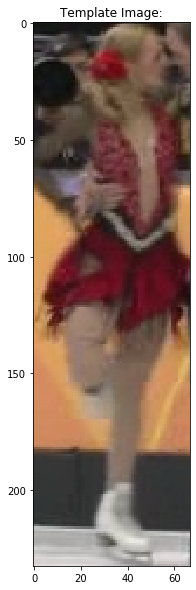

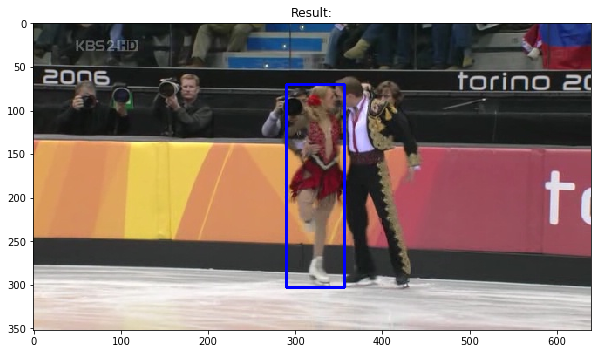

In [9]:
template_rect1 = (290,70,67,233)
template_img = "1.jpg"
search_img = template_img
method = cv2.TM_SQDIFF
run_cv_template_matching(search_img, template_img, template_rect1, method)

Template image is from search image. 100% match, min value is 0.0

Match val: 28057056.0


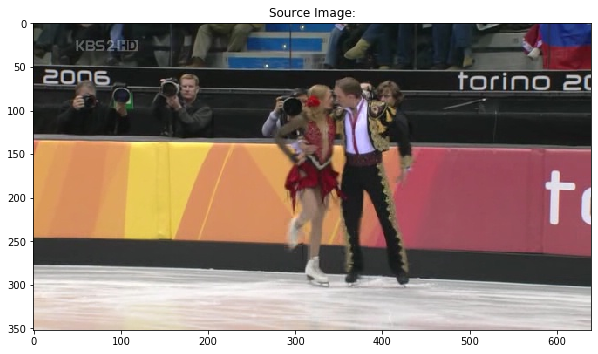

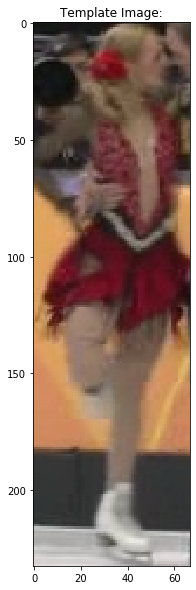

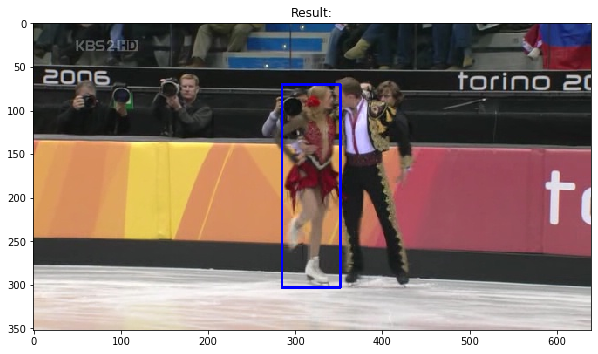

In [10]:
search_img = "2.jpg"
run_cv_template_matching(search_img, template_img, template_rect1, method)

Template image is from different but very similar image. 100% match, but min value is already not 0.0

Match val: 111985776.0


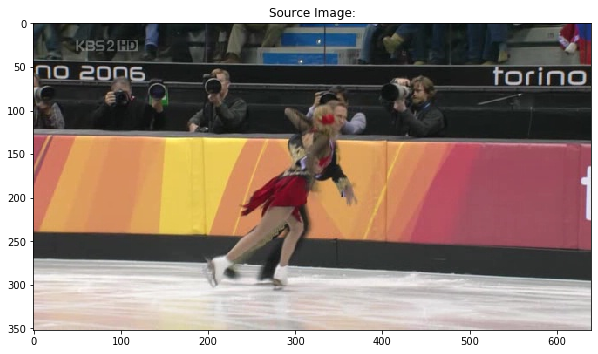

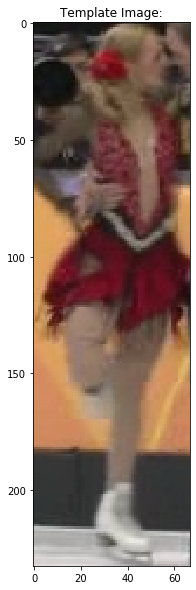

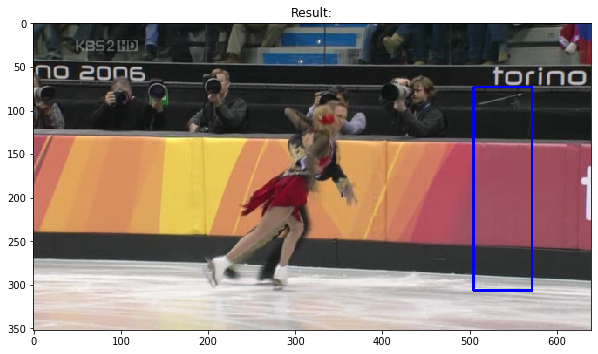

In [11]:
search_img = "3.jpg"
run_cv_template_matching(search_img, template_img, template_rect1, method)

Template image is from different image. No match, min value is very high.

# NCC

Match val: 1.0


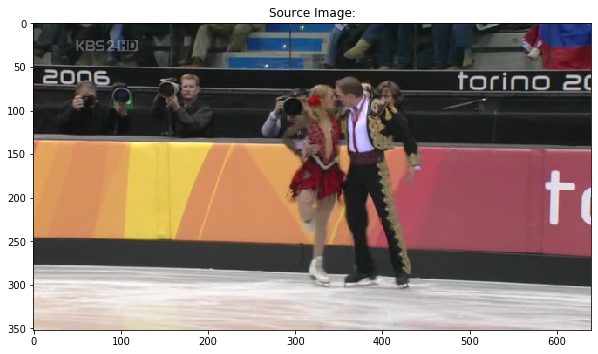

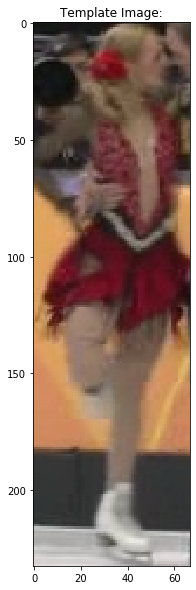

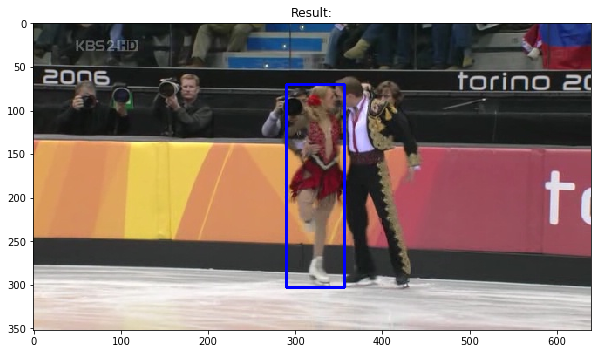

In [12]:
template_rect1 = (290,70,67,233)
template_img = "1.jpg"
search_img = template_img
method = cv2.TM_CCORR_NORMED
run_cv_template_matching(search_img, template_img, template_rect1, method)

Template image is from search image. 100% match, max value is 1.0

Match val: 0.9758875966072083


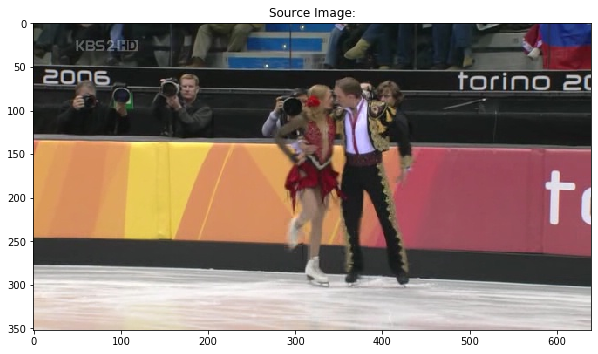

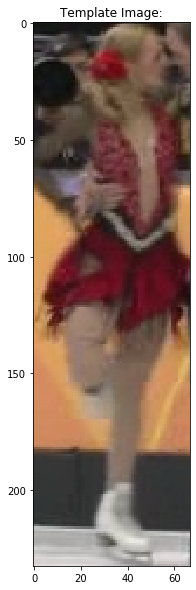

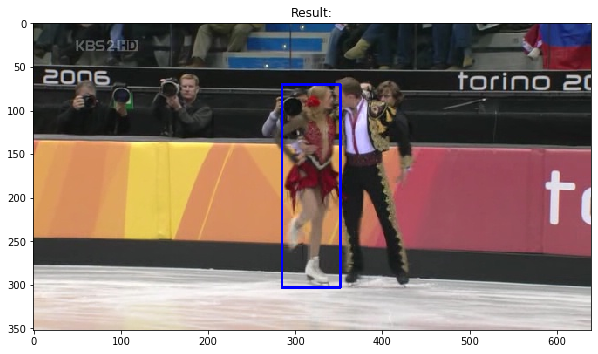

In [13]:
search_img = "2.jpg"
run_cv_template_matching(search_img, template_img, template_rect1, method)

Template image is from different but very similar image. 100% match, max value is close to 1.0

Match val: 0.8958864808082581


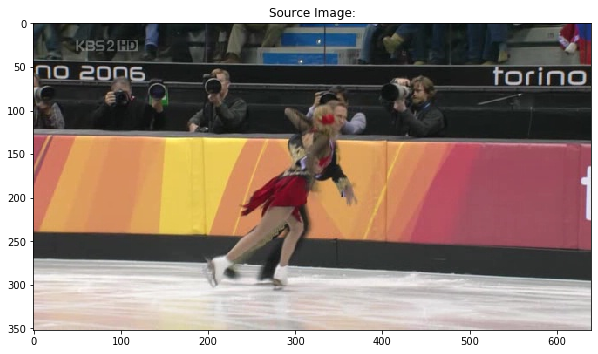

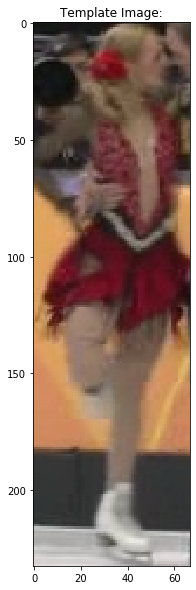

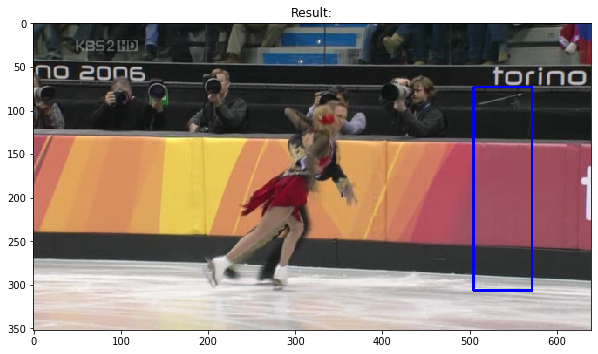

In [14]:
search_img = "3.jpg"
run_cv_template_matching(search_img, template_img, template_rect1, method)

Template image is from different image. No match, result is similar as with SSD